#REGRESSÃO LINEAR

A análise de regressão originou-se com Francis Galton ao verificar que a altura dos filhos de pais mais altos ou baixos que o padrão se move no sentido da altura média da população. Consiste no estudo da dependência de uma variável dependente em relação a umas variáveis explicativas visando estimar/prever o valor médio.

Os modelos de regressão linear são os que possuem linearidade nos parâmetros $\beta$.

Ao supormos que $E\left(Y\middle| X_i\right)$ é linear tem-se:


$Y_i=\beta_1+\beta_2X_i+u_i$

Em que, 
-  $Y_i$: É a variável dependente,
-  $X_i$: São as variáveis regressoras, 
-  $\beta_1$: Intercepto, 
-  $\beta_2$ Coeficiente de inclinação, e 
-  $u_i$ termo de erro.

O termo de erro capta: Caráter vago da teoria,Indisponibilidade de dados,Caráter intrinsecamente aleatório do comportamento humano, Forma Funcional Errada, entre outros.

O método de estimação de $\beta_1$ e $\beta_2$ é chamado de Mínimos Quadrados Ordinários (MQO/OLS) e consiste em minimizar o somatório do erro ao quadrado. Na regressão múltipla, convém utilizar a forma matricial, e a matriz de parâmetros $\beta$ é dada por:

$\begin{matrix}\left[\begin{matrix}Y_1\\\begin{matrix}Y_2\\\begin{matrix}\vdots\\Y_n\\\end{matrix}\\\end{matrix}\\\end{matrix}\right]\\\begin{matrix}Y=\\n\times1\\\end{matrix}\\\end{matrix}=\begin{matrix}\left[\begin{matrix}1\\\begin{matrix}1\\\begin{matrix}\vdots\\1\\\end{matrix}\\\end{matrix}\\\end{matrix}\begin{matrix}X_{2\ 1}\\\begin{matrix}X_{2\ 2}\\\begin{matrix}\vdots\\X_{2\ n}\\\end{matrix}\\\end{matrix}\\\end{matrix}\begin{matrix}X_{3\ 1}\\\begin{matrix}X_{3\ 2}\\\begin{matrix}\vdots\\X_{3\ n}\\\end{matrix}\\\end{matrix}\\\end{matrix}\begin{matrix}\cdots\\\begin{matrix}\cdots\\\begin{matrix}\ddots\\\cdots\\\end{matrix}\\\end{matrix}\\\end{matrix}\begin{matrix}X_{k\ 1}\\\begin{matrix}X_{k2}\\\begin{matrix}\vdots\\X_{k\ n}\\\end{matrix}\\\end{matrix}\\\end{matrix}\right]\\\begin{matrix}X\\n\times k\\\end{matrix}\\\end{matrix}\begin{matrix}\left[\begin{matrix}\beta_1\\\begin{matrix}\beta_2\\\begin{matrix}\vdots\\\beta_k\\\end{matrix}\\\end{matrix}\\\end{matrix}\right]\\\begin{matrix}\beta\\k\times1\\\end{matrix}\\\end{matrix}+\begin{matrix}\left[\begin{matrix}u_1\\\begin{matrix}u_2\\\begin{matrix}\vdots\\u_n\\\end{matrix}\\\end{matrix}\\\end{matrix}\right]\\\begin{matrix}u\\n\times1\\\end{matrix}\\\end{matrix}$

Como resultado da minimização do somatório do erro ao quadrado, os parâmetros $\beta$ são dados por:

- $\hat{{\beta}}={({X}'{X})}^{-1}X'Y$


Os estimadores de MQO são os melhores estimadores lineares não viesados e eficientes. Para que possua essas características, o modelo deve atender as seguintes hipóteses: 
- Resíduos Homocedasticidade, 
- Ausencia de autocorrelação residual, 
- Ausência de multicolinearidade, 
- Normalidade dos resíduos.

In [148]:
import pandas as pd
from scipy import stats
# Import math Library
import numpy as np
#from sklearn.family import Model #modelos de machine learning
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns  
import matplotlib.pyplot as plt  

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
data= pd.read_csv('/content/sample_data/california_housing_train.csv')

In [150]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

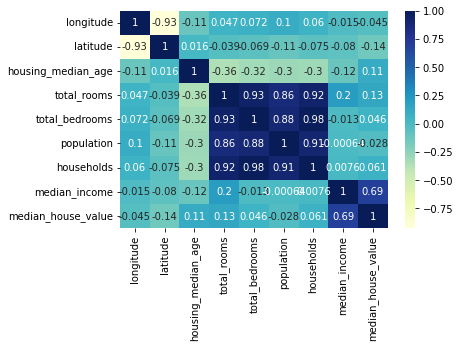

In [151]:
df_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
data.columns

In [152]:
# Select variables
data=data[['housing_median_age','total_rooms','total_bedrooms','median_income','median_house_value']]

In [153]:
x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [154]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
model = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
model.summary()

# mostrando as previsões para o mesmo conjunto passado
#results.predict()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5246.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:46:11   Log-Likelihood:            -2.1553e+05
No. Observations:               17000   AIC:                         4.311e+05
Df Residuals:                   16995   BIC:                         4.311e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.906e+04   2480.703    -23.808      0.000   -6.39e+04   -5.42e+04
housing_median_age  1935.8036     50.774     38.126      0.000    1836.281    2035.327
total_rooms          -26.6107      0.895    -29.749      0.000     -28.364     -24.857
total_bedrooms       161.9471      4.498     36.004      0.000     153.130     170.764
median_income       4.996e+04    376.572    132.663      0.000    4.92e+04    5.07e+04
==============================================================================
Omnibus:                     3295.894   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9615.399
Skew:                           1.018   Prob(JB):                         0.00
Kurtosis:                       6.071   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MULTICOLINEARIDADE

A multicolinearidade ocorre quando há correlações perfeitas entre as variáveis, tornando-as colineares (Relação linear). Faz com que os parâmetros possuam grande variância e covariância, tornando a estimação menos precisa. Além disso os intervalos de confiança tende a incluir o 0, deixando o teste t não-significante. Variável não significante com R² alto indica multicolinearidade. Pode ser detectado das seguintes formas: 
- I) R² alto, F alto, razões t não-significantes; 
- II)alta correlação entre os regressores; 
- III) Fator de Inflação da Variância(FIV) maior que 10. 

Pode-se adotar os seguintes procedimentos para correção: 
- I)Excluir variável 
- II) Aplicar primeira diferença ou transformação proporcinal 
- III) Análise fatorial e regressão ridge

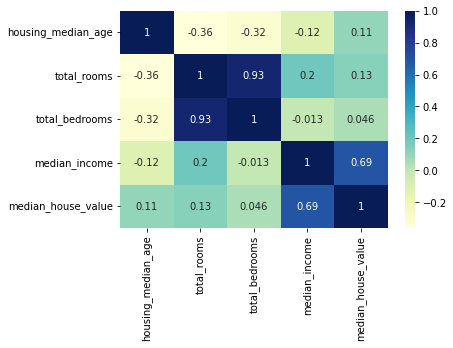

In [155]:
# plotting the correlation heatmap  
df_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)  

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,3.5,housing_median_age
1,25.3,total_rooms
2,22.9,total_bedrooms
3,4.7,median_income


#HETEROCEDASTICIDADE

A heterocedasticidade ocorre quando a variância do termo de erro não é constante. Sua causa pode estar associado a erros na forma funcional, omissão de variável, modelos gerados por aprendizagem e erro, presença de outliers. Como consequência, a heterocedasticidade pode gerar estimadores ineficientes, isto é, Erros-padrão viesados, o que acarreta problemas com os testes de hipótese t. Pode-se detectar heterocedasticidade das seguintes formas:
- I) Análise gráfica dos resíduos (Informal);
- II) Teste de Park;
- III) Testes Breusch-Pagan;
- IV) Teste Cook-Weisber;
- V) Teste de White;
- VI)Teste de Glesjer;
- VII) Teste de Goldfeld-Quandt;
- VIII)TESTE de Breusch Pagan Godfrey;
- IX) Teste de Koenker-Basset, Entre outros.

Para corrigir o problema da heterocedasticidade pode-se, utilizar as seguintes técnicas: 
- I) Mínimos Quadrados Ponderados: Utilizado quando há o diagnóstico de que a variância dos termos de erro depende da variável explicativa; 
- II) Erros-Padrão Robustos de Huber-White: Esse método não altera a estimação dos parâmetros, mas sim os erros-padrão dos mesmos, o que por sua vez, interfere na estatística T.

In [139]:
print("Park's heterocedasticy test \n Ho: Homocedasticy")
for col in x.columns:
    # Calculate residuals and squared residuals
    squared_residuals = model.resid ** 2

    # Fit OLS model with squared residuals as dependent variable
    squared_model = sm.OLS(np.log(squared_residuals), sm.add_constant(x[col])).fit()

    # Calculate Park's test statistic and p-value
    const, t_value = squared_model.tvalues
    const, p_value = squared_model.pvalues

    # Print results
    print("\n Variable ", col,
          "\n Park's Test Statistic: ", round(t_value,3),
          "\n p-value: ", round(p_value,4))

Park's heterocedasticy test 
 Ho: Homocedasticy

 Variable  housing_median_age 
 Park's Test Statistic:  15.058 
 p-value:  0.0

 Variable  total_rooms 
 Park's Test Statistic:  1.04 
 p-value:  0.2984

 Variable  total_bedrooms 
 Park's Test Statistic:  1.134 
 p-value:  0.2569

 Variable  median_income 
 Park's Test Statistic:  15.496 
 p-value:  0.0


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#perform Goldfeld-Quandt test
Statistic,p_value,other=sm.stats.diagnostic.het_goldfeldquandt(y, x)
print('Goldfeld-Quant Teste Heterocedasticity',
    '\n H0: Homoscedasticity',
      '\n Statistic: ', round(Statistic,4),
      '\n p-value: ', round(p_value,4))

Goldfeld-Quant Teste Heterocedasticity 
 H0: Homoscedasticity 
 Statistic:  1.154 
 p-value:  0.0


In [ ]:
#Breusch-Pagan test
import statsmodels.stats.api as sms
Statistic, p_value, F_Statistic, f_p_value = sms.het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test',
      '\n H0: Homoscedasticity',
    '\n Statistic: ', round(Statistic,4),
      '\n p-value:' , round(p_value,4),
      '\n f-value: ', round(F_Statistic,4),
      '\n f p-value: ', round(f_p_value,4))

Breusch-Pagan test 
 H0: Homoscedasticity 
 Statistic:  426.4944 
 p-value: 0.0 
 f-value:  109.3352 
 f p-value:  0.0


In [ ]:
# White Test
from statsmodels.stats.diagnostic import het_white
Statistic, p_value, F_Statistic, f_p_value = het_white(model.resid,  model.model.exog)
print('White Test',
      '\n H0: Homoscedasticity',
    '\n  Statistic: ', round(Statistic,4),
      '\n p-value:' , round(p_value,4),
      '\n f-value: ', round(F_Statistic,4),
      '\n f p-value: ', round(f_p_value,4))

White Test 
 H0: Homoscedasticity 
  Statistic:  3299.7079 
 p-value: 0.0 
 f-value:  292.202 
 f p-value:  0.0


In [157]:
#Teste de Koenker-Basset(KB)
#pode ser potente, nao-sensivel a normalidade dos resíduos
squared_residuals = model.resid ** 2
squared_fitted_values= model.fittedvalues**2

In [166]:
kb_test= sm.OLS(squared_residuals, sm.add_constant(squared_fitted_values)).fit()
const, t_valor =kb_test.tvalues
const, p_valor=kb_test.pvalues
print("Koenker-Basset Heterocedasticy Test \n H0: Homocedasticy",
      "\n F statistic: ", round(kb_test.fvalue,3),
      "\n F P-value: ", round(kb_test.f_pvalue,3),
      "\n T Statistic: ", round(t_valor,3),
      "\n T P-Value: ", round(p_valor,3))

Koenker-Basset Heterocedasticy Test 
 H0: Homocedasticy 
 F statistic:  810.616 
 F P-value:  0.0 
 T Statistic:  28.471 
 T P-Value:  0.0


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# AUTO CORRELAÇÃO

Autocorrelação residual ocorre quando os resíduos são correlacionados entre si. Podendo ser correlação de ordem 1, ou ordem superiores. É comum em regressões de séries-temporais. Pode ocorrer por erro de especificação, Omissão de variáveis, Sazonalidade. Como consequência gera estimadores ineficientes, com erros-padrão subestimados, o que afeta a estatística t. A autocorrelação pode ser detectada usando os seguintes métodos: 

- I)Teste de Durbin-Watson: Verifica a existência de autocorrelação de 1º ordem, Além disso não funciona em modelos autorregressivos. 
- II) Teste de Breusch-Godfrey: Permite o teste em modelos autoregressivos, além de verificação em ordem superiores a 1. 

Para corrigir esse problema, pode-se: 

- I) alterar a forma funcional, colocando em primeira diferença; 
- II) Caso seja autocorrelação pura, isto é, não advinda de problemas de especificação, pode-se utilizar MQG.

In [169]:
import statsmodels.stats.diagnostic as dg

#perform Breusch-Godfrey test at order p = 3
chi3, p_value3, a3,b3= dg.acorr_breusch_godfrey(model, nlags=3)
chi6, p_value6, a6,b6= dg.acorr_breusch_godfrey(model, nlags=6)
chi9, p_value9, a9,b9= dg.acorr_breusch_godfrey(model, nlags=9)
print('Breusch-Godfrey Autocorrelation test',
      '\n H0: Não há autocorrelação de ordem p ou inferior',
      '\n  p-value (lags: 3): ', round(p_value3,4),
      '\n  p-value (lags: 6):' , round(p_value6,4),
      '\n  p-value (lags: 9):', round(p_value9,4))

Breusch-Godfrey Autocorrelation test 
 H0: Não há autocorrelação de ordem p ou inferior 
  p-value (lags: 3):  0.0 
  p-value (lags: 6): 0.0 
  p-value (lags: 9): 0.0


#Transformação box-cox

Caso os resíduos da regressão não sejam normais, os teste F e T não são válidos, pois pressupõem normalidade dos resíduos. Nesse sentido, Aplica-se os testes de normalidade nos resíduos, pode ser o de Shapiro-Wilk (Pequenas amostras), Jarque-bera (assintótico), Shapiro-Francia(Grandes amostras). 

Porém, esse pressuposto pode ser violado caso se esteja trabalhando com grandes amostras, pois a ausencia de normalidade só acontece em amostras. A aderência da variável dependente Y a distribuição normal, pode fazer com que os resíduos gerados seja normal. Além disso, a não-normalidade dos resíduos, pode indicar erro de especificação, omissão de variáveis.

Para que as previsões possam ser geredas corretamente, é preciso que a distribuição dos resíduos seja normal, pois irá garantir que os resíduos são aleatórios.

A transformação Box-Cox pode auxiliar a normalizar os resíduos. Consiste em um modelo geral de regressão a apartir do qual todas as formas funcionais derivam. Consiste em substituir $Y$ por $\frac{Y^{\lambda}-1}{\lambda}$ e $X$ por $\frac{X^{\theta}-1}{\theta}$ em que $\lambda$ e $\theta$ são parâmetros da transformação. Qual parâmetro de box-cox que maximiza a aderência à normalidade da distribuição dos resíduos.


In [ ]:
from scipy.stats import shapiro
statistic, pvalue= shapiro(model.resid)
print('Estatística de teste:', statistic,'\n P-valor:',pvalue)

bc_values,bc_lambda=stats.boxcox(data['median_house_value'])
data['y_bc']=bc_values
print('Box-Cox Lambda:', bc_lambda)

In [ ]:
#Set X and Y
x= data.drop(['y_bc','median_house_value'], axis=1)
y=data['y_bc']
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
model = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
model.summary()

In [ ]:
statistic, pvalue= shapiro(model.resid)
print('Estatística de teste:', statistic,'\n P-valor:',pvalue)

#Diagnóstico dos dados utilizados para exemplo:

Foi utilizado à título de exemplo as variáveis 'housing_median_age','total_rooms','total_bedrooms','median_income'. Sendo a variável 'median_house_value' a de interesse.
Os resultados apontam que em uma regressão múltipla sem transformações, Variáveis como total de quartos possui sinal inverso ao esperado, uma vez que se espera que quanto maior a quantidade de quartos, maior o preço médio da casa.
Esse fenômeno ocorre devido a estimação na presença de alta correlação entre total_rooms','total_bedrooms', 0,93. o FIV confirma que a alta correlação entre essas variáveis afeta o desempenho do modelo.

Como a maioria dos testes de heterocedasticidades são sensíveis a normalidade dos resíduos, convém utilizar o teste KB. Seus resultados indicam que o modelo sofre de heterocedasticidade. O teste de park indica que variáveis como "housing_median_age" e "median_income". São responsáveis pela heterocedasticidade do modelo.

Em termos de autocorrelação residual, a estatística DB, indica que os dados sofrem de autocorrelação de primeiro grau. Enquanto os resultados do teste de Breusch e Godfrey indicam que há autocorrelação residual de  de ordem 9 ou inferior.

Mesmo aplicando a transformação de Box-Cox, os resíduos do modelo não aderem a normalidade.

Portanto, Sugere-se identificar novas variáveis que possam explicar o valor médio das casas. Uma vez que as variáveis utilizadas são insuficientes e geram problemas econométrico que comprometem a robustez do modelo. Além disso, os resultados podem indicar que o modelo de regressão linear pode não ser o mais indicado para exprimir a relação entre a variável objetivo e seus regressores.